In [2]:
%matplotlib inline
%pip install lightkurve
%pip install matplotlib
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import lightkurve as lk

In [4]:
TIC = 'TIC 284475976'
available_data_select = lk.search_lightcurve(TIC, author = 'SPOC')
lc_collection = available_data_select.download_all().stitch()

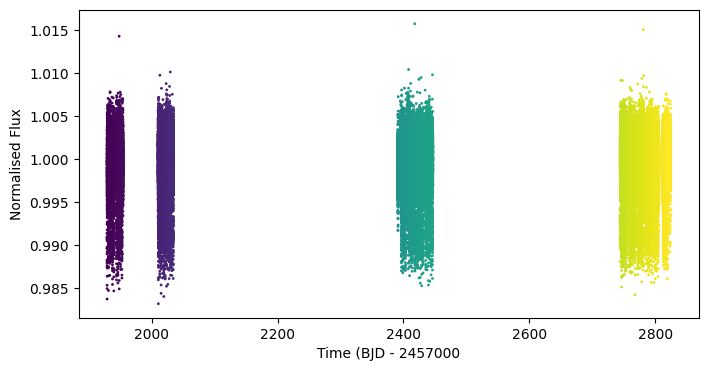

In [5]:
fig, ax = plt.subplots( figsize = (8, 4) )
plt.scatter(lc_collection.time.value, lc_collection.flux.value, c = lc_collection.time.value, s = 1)
plt.xlabel("Time (BJD - 2457000")
plt.ylabel("Normalised Flux")
plt.show()

^^ Data is coloured by time <br />
Colour -> Brighter as time increases

In [6]:
transit_time_1 = 1931.56 # Exact point of [first] light curve (on above graph)
transit_time_2 = 1933.71 # Create a function to get deepest point later

period = transit_time_2 - transit_time_1
print("Period: {} days".format(period))

Period: 2.150000000000091 days


(-0.5, 0.5)

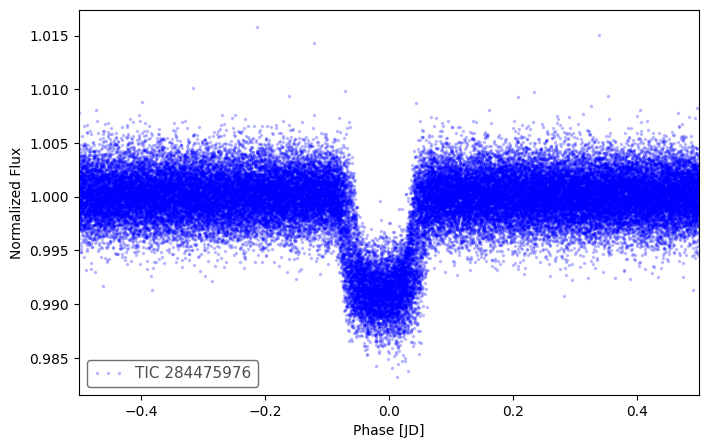

In [7]:
period = 2.1437 # oribital period ~ estimate based on above period variable

# Phase fold the light curve
lc_phased = lc_collection.fold(period = period, epoch_time = transit_time_1)
# Plot the binned and unbinned lightcurves on the same figure (both phase folded)
fig, ax = plt.subplots(figsize = (8, 5))
lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'blue', alpha = 0.2, markersize = 3)

plt.xlim(-0.5, 0.5)

In [8]:
# Interactive -> finding the orbital period
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [9]:
def plot_phase_folded_color(period):
    lc_phased = lc_collection.fold(period = period, epoch_time = transit_time_1) # Phase fold light curve
    fig, ax = plt.subplots(figsize = (8, 5))
    plt.scatter(lc_phased.time.value, lc_phased.flux.value, c = lc_phased.time_original.value, s = 1, marker = '.')
    plt.xlabel("Phase")
    plt.ylabel("Normalised flux")
    plt.show()

In [10]:
# change the period using a slider and watch how different orbital periods affect the phase folded lightcurve
interact(plot_phase_folded_color, period = widgets.FloatSlider(value=2.145,min =2.14,max=2.15,step=0.0001,description='period:', readout_format='.4f'))

"""
The values in bold need to be changed for different targets!
value: starting guess at the period
min: the minimum period that you think it could be
max: the maximum period that you think it could be
step: the step size that the widget jumps when you press the up or down arrow on your keyboard (good starting point=0.0001 - if you see no change in the phase folded lighcurve when you press the up and down errors then make the step sizelarger!)
"""

interactive(children=(FloatSlider(value=2.145, description='period:', max=2.15, min=2.14, readout_format='.4f'…

'\nThe values in bold need to be changed for different targets!\nvalue: starting guess at the period\nmin: the minimum period that you think it could be\nmax: the maximum period that you think it could be\nstep: the step size that the widget jumps when you press the up or down arrow on your keyboard (good starting point=0.0001 - if you see no change in the phase folded lighcurve when you press the up and down errors then make the step sizelarger!)\n'